# Algo Evaluation - Project

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

# step 1 = Data Ingestion

In [5]:
import pandas as pd


In [6]:
df= pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [7]:
df[['Machine failure']].value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

# step 2 = basic data quality check

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [9]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

# Step 3 = sep x and y

In [11]:
X = df.drop(columns=["id","Product ID","Machine failure"])
Y = df[["Machine failure"]]

In [12]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [13]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [14]:
## now we make use of preprocess function from utils for sep cat and con data and 
## creating a preprocessed data by making use of pipelines eighter cat eighter con or both(in our case)

# step 4

In [15]:
import sys
import os

In [16]:
root_dir = os.path.join(os.getcwd(), "..")
sys.path.append(root_dir)

In [17]:
root_dir

'c:\\Users\\ASUS\\Documents\\MACHINE LEARNING REQ FILES\\repository\\14 project algo eval\\..'

In [18]:
from utils import preprocess_data

In [19]:
X_pre , pre = preprocess_data(X)

In [20]:
X_pre.head()

,num__Air temperature _K_,num__Process temperature _K_,num__Rotational speed _rpm_,num__Torque _Nm_,num__Tool wear _min_,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0


In [21]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

# step 5 = apply train test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain , xtest , ytrain , ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [24]:
xtrain.head()

,num__Air temperature _K_,num__Process temperature _K_,num__Rotational speed _rpm_,num__Torque _Nm_,num__Tool wear _min_,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0


In [25]:
xtest.head()

,num__Air temperature _K_,num__Process temperature _K_,num__Rotational speed _rpm_,num__Torque _Nm_,num__Tool wear _min_,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0


In [26]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [27]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [28]:
xtrain.shape

(109143, 12)

In [29]:
xtest.shape

(27286, 12)

In [30]:
ytrain.shape

(109143, 1)

In [31]:
ytest.shape

(27286, 1)

# step 6 = Algo evalutaion

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
models =[
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()

]

In [34]:
models2 = [ XGBClassifier()]

In [35]:
from utils import evaluate_single_model

In [36]:
from utils import algo_evaluation

In [37]:
res_df ,best_model = algo_evaluation(models,xtrain,ytrain,xtest,ytest)

{'name': 'LogisticRegression', 'model': LogisticRegression(), 'f1_train': 0.9302961192536252, 'f1_test': 0.9314565053016582, 'f1_cv': np.float64(0.9301488260252861)}

{'name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1_train': 0.9974641142940155, 'f1_test': 0.8822715764392457, 'f1_cv': np.float64(0.8699276771599502)}

{'name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1_train': 0.9973234537870457, 'f1_test': 0.9310660054302231, 'f1_cv': np.float64(0.9275859699923942)}

{'name': 'GradientBoostingClassifier', 'model': GradientBoostingClassifier(), 'f1_train': 0.9357206926028346, 'f1_test': 0.9308524696197871, 'f1_cv': np.float64(0.9281505105297786)}

{'name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature

In [38]:
res_df

,name,model,f1_train,f1_test,f1_cv
0,LogisticRegression,LogisticRegression(),0.9303,0.9315,0.9301
1,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.9357,0.9309,0.9282
2,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9973,0.9311,0.9276
3,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9561,0.9292,0.9275
4,DecisionTreeClassifier,DecisionTreeClassifier(),0.9975,0.8823,0.8699


In [39]:
best_model

LogisticRegression()

# step 7 = evaluate the best model in detail

In [40]:
best_model.score(xtrain,ytrain)

0.9961884866642845

In [41]:
best_model.score(xtest,ytest)

0.9961518727552591

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

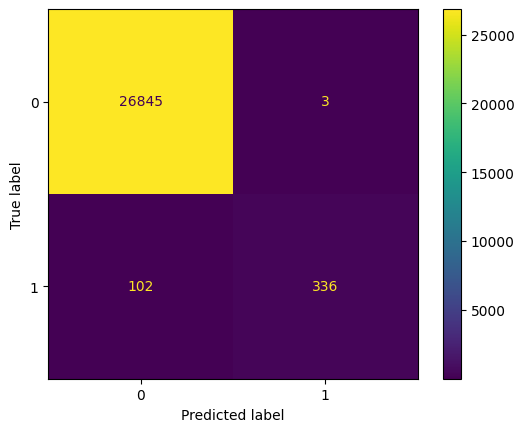

In [43]:
ConfusionMatrixDisplay.from_estimator(best_model,xtest,ytest)

In [44]:
ypred_test = best_model.predict(xtest)
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [45]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



# out of sample data predictions


In [47]:
xnew = pd.read_csv('test_machine.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [48]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [49]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [50]:
xnew_pre = pre.transform(xnew)

In [51]:
xnew_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90949,1.308759,1.053251,-0.261872,0.006040,-1.397783,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
90950,-1.053986,-0.101844,0.156188,-0.770229,-1.147645,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
90951,-2.289058,-2.700806,-0.139337,0.123657,1.291196,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
90952,-0.946589,-1.545712,0.098524,-0.005721,-0.553568,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0


In [52]:
xnew_pre.columns = xnew_pre.columns.astype(str).str.replace(r"[\[\]<>]", "_", regex=True)


In [53]:
xnew_pre

,num__Air temperature _K_,num__Process temperature _K_,num__Rotational speed _rpm_,num__Torque _Nm_,num__Tool wear _min_,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90949,1.308759,1.053251,-0.261872,0.006040,-1.397783,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
90950,-1.053986,-0.101844,0.156188,-0.770229,-1.147645,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
90951,-2.289058,-2.700806,-0.139337,0.123657,1.291196,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
90952,-0.946589,-1.545712,0.098524,-0.005721,-0.553568,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0


In [54]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0])

In [70]:
probs = best_model.predict_proba(xnew_pre)[:, 1]


In [71]:
probs

array([0.0020923 , 0.00103873, 0.00271455, ..., 0.00313573, 0.00253279,
       0.00213042], shape=(90954,))

In [72]:
best_model.classes_

array([0, 1])

In [73]:
probs = probs[:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [74]:
xnew["machine failure"] = preds
xnew["probs"] = probs


In [65]:
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,machine failure
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0


In [66]:
xnew["machine failure"].value_counts()

machine failure
0    89848
1     1106
Name: count, dtype: int64

In [76]:
result = xnew[["id", "Product ID", "Type", "machine failure", "probs"]]


In [77]:
result.head()

,id,Product ID,Type,machine failure,probs
0,136429,L50896,L,0,0.002092
1,136430,L53866,L,0,0.001039
2,136431,L50498,L,0,0.002715
3,136432,M21232,M,0,0.003231
4,136433,M19751,M,0,0.003826


In [78]:
result.to_csv("Results.csv",index=True)

# store the pre and best_model

In [80]:
import joblib

In [81]:
joblib.dump(pre,"pre.joblib")

['pre.joblib']

In [82]:
joblib.dump(best_model,"best_model.joblib")

['best_model.joblib']